<center> <h1 style="background-color:seagreen; color:white" > <br>Análise e Visualização de Dados da Geração Distribuída Fotovoltaica no Brasil <br></h1></center> 

<center> <h4 style="background-color:DarkKhaki; color:white" > <br>Análise e Visualização dos dados da relação de empreendimentos de Geração Distribuída Fotovoltaica no Brail disponibilizado pela Aneel - (Agência Nacional de Energia Elétrica) <br></h4></center> 

A Resolução Normativa ANEEL no 482/2012, em vigor desde 17 de abril de 2012, permitiu aos consumidores brasileiros a geração própria de energia elétrica a partir de fontes renováveis ou cogeração qualificada. Este novo modelo, denominado Geração Distribuída de Energia, possibilita que residências, empresas e indústrias se tornem geradoras de energia, podendo inclusive fornecer o excedente para a rede de distribuição local. As unidades consumidoras estão localizadas próximas às geradoras, reduzindo a sobrecarga no sistema de transmissão, e em algumas modalidades, unidades de consumo distantes também podem se beneficiar da energia gerada. A geração distribuída consiste em pequenas unidades geradoras localizadas próximas ao local de consumo, utilizando fontes de energia renováveis. Essa abordagem representa uma alternativa à geração centralizada, que envolve grandes usinas distantes dos centros consumidores.

O Dataset trata de dados referentes aos micro e minigeradores distribuídos, abrangidos pela Resolução Normativa nº 482/2012. A relação dos empreendimentos é classificada pelas variáveis que compõem sua identificação, quais sejam:

<ul>
    <li>Distribuidora conectada;</li>
    <li>Código do empreendimento; </li>
    <li>Núcleo numérico do código do empreendimento; </li>
    <li>Nome do titular; </li>
    <li>Classe de produção; </li>
    <li>Subgrupo; </li>
    <li>Quantidade de unidades consumidoras que recebem os créditos;</li>
    <li>Data da conexão;</li>
    <li>Tipo de unidade produtora;</li>
    <li>Fonte;</li>
    <li>Potência instalada;</li>
    <li>Município e unidade de federação onde está localizada. </li>
</ul>

Os dados são expressos em quantidades e potência instalada em kW (quilowatt). A quantidade corresponde ao número de micro ou minigeradores distribuídos instalados no período especificado. A potência instalada é definida pelo somatório da potência elétrica ativa nominal das unidades geradoras.

A unidade de energia elétrica atualmente utilizada pela ANEEL é o kWh (quilowatt-hora) ou o MWh (megawatt-hora).



In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid', palette='deep')


### Carregando a base de dados

In [87]:
df = pd.read_csv("empreendimento-gd-informacoes-tecnicas-fotovoltaica.csv")

In [88]:
df.head()

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor
0,1,2024-01-30T00:00:00,GD.MG.000.010.856,"18,00","2,34",risen,b&b,2017-05-30T00:00:00,"2,34","2,34",9,,
1,2,2024-01-30T00:00:00,GD.RS.000.010.924,"23,28","3,00",Canadian Solar,Fronius,2017-05-11T00:00:00,"3,20","3,00",10,CS6X-320P,Primo 3.0-1
2,3,2024-01-30T00:00:00,GD.SP.000.010.974,"24,00","3,00",CSUN,AP SYSTEMS,2017-05-19T00:00:00,"3,72","3,00",12,CSUN -72P 310 KW,YC500
3,4,2024-01-30T00:00:00,GD.RS.000.010.988,"21,56","3,63",SunEdison,Fronius,2017-05-24T00:00:00,"3,63","4,00",11,SE-F330BMC34,Primo 4.0-1
4,5,2024-01-30T00:00:00,GD.SP.000.011.006,"14,40","2,38",Canadian,Fronius,2017-05-18T00:00:00,"2,38","2,50",9,CS6P 265 Wp,Galvo 2.5


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346000 entries, 0 to 345999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   _id                      346000 non-null  int64 
 1   DatGeracaoConjuntoDados  346000 non-null  object
 2   CodGeracaoDistribuida    346000 non-null  object
 3   MdaAreaArranjo           346000 non-null  object
 4   MdaPotenciaInstalada     346000 non-null  object
 5   NomFabricanteModulo      345998 non-null  object
 6   NomFabricanteInversor    346000 non-null  object
 7   DatConexao               346000 non-null  object
 8   MdaPotenciaModulos       346000 non-null  object
 9   MdaPotenciaInversores    346000 non-null  object
 10  QtdModulos               346000 non-null  int64 
 11  NomModeloModulo          345998 non-null  object
 12  NomModeloInversor        345970 non-null  object
dtypes: int64(2), object(11)
memory usage: 34.3+ MB


<center> <h1 style="background-color:seagreen; color:white" > <br>Descrição dos atribultos da tabela <br></h1></center> 


| **Nome do Campo**  | **Tipo do dado** | **Tamanho do Campo** | **Descrição** |
| -------------------| -----------------| ---------------------| --------------|
| DatGeracaoConjuntoDados | Data Simples |  |  Data do processamento de carga automática no momento da geração para publicação do conjunto de dados abertos. |
| CodGeracaoDistribuida | Cadeia de caracteres | 21 | Código da Unidade Geradora |
| MdaAreaArranjo | Numérico | 8,2  | Total da área de Arranjo |
| MdaPotenciaInstalada  | Numérico  | 6,2 |  Medida da potência instalada |
| NomFabricanteModulo | Cadeia de caracteres | 100 | Nome do fabricante do módulo |
| NomFabricanteInversor  | Cadeia de caracteres | 100 | Nome do fabricante do inversor |
| DatConexao | Data Simples |  | Data da conexão da Unidade Geradora |
| MdaPotenciaModulos | Numérico | 6,2 | Armazena os dados expressos em quantidades e potência dos módulos em MW (quilowatt), definida pela somatória das potências elétricas ativas nominais dos módulos da central de geração distribuída |
| MdaPotenciaInversores | Numérico | 6,2 | Armazena os dados expressos em quantidades e potência dos inversores em MW (quilowatt), definida pela somatória das potências elétricas ativas nominais dos módulos da central de geração distribuída |
| QtdModulos | Numérico | 10 | Quantidade de Módulos |
| NomModeloModulo |  Cadeia de caracteres | 100 | Nome do modelo do Módulo |
| NomModeloInversor | Cadeia de caracteres | 100 | Nome do modelo do Inversor |


<center> <h1 style="background-color:seagreen; color:white" > <br>Análise Exploratória de Dados <br></h1></center> 

<center> <h3 style="background-color:#868661; color:white" > <br>Tratamento dos dados numéricos <br></h3></center>


Convertendo os dados numericos para a notação que a linguagem de programação entenda, para isso é necessário substituir a virgula por ponto e depois converter a informação que antes erá uma string python para um valor numérico, para esse processo foi usado o método **.aplly()** além disso, usou-se o método array do NumPy para converter os dados em numéricos float32.

Colunas convertidas: 

<ul>
    <li>MdaAreaArranjo</li>
    <li>MdaPotenciaInstalada</li>
    <li>MdaPotenciaModulos</li>
    <li>MdaPotenciaInversores</li>
</ul>


Antes:
`18,00` String

Depois:
`18.00` float32


In [90]:
df["MdaAreaArranjo"] = np.array(df["MdaAreaArranjo"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaInstalada"] = np.array(df["MdaPotenciaInstalada"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaModulos"] = np.array(df["MdaPotenciaModulos"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaInversores"] = np.array(df["MdaPotenciaInversores"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["QtdModulos"] = np.array(df["QtdModulos"].apply(lambda x: float(x)), dtype="float32")

<center> <h3 style="background-color:#868661; color:white" > <br>Convertendo as colunas de data para o tipo <strong>datitime</strong> do pandas <br></h3></center>

Para realizar essa conversão usa-se o método `.to_datitime()`, as colunas `DatGeracaoConjuntoDados`e `DatConexao` serão convertidas para esse formato.

In [91]:
df["DatGeracaoConjuntoDados"] = pd.to_datetime(df["DatGeracaoConjuntoDados"])
df["DatConexao"] = pd.to_datetime(df["DatConexao"])

<center> <h3 style="background-color:#868661; color:white" > <br>Criando atribultos Ano, Mês e Dia <br></h3></center>

In [92]:
df["Year"] = df["DatConexao"].apply(lambda x: x.year)
df["Month"] = df["DatConexao"].apply(lambda x: x.month)
df["Day"] = df["DatConexao"].apply(lambda x: x.day)

In [93]:
df.head(-1)

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor,Year,Month,Day
0,1,2024-01-30,GD.MG.000.010.856,18.000000,2.34,risen,b&b,2017-05-30,2.34,2.34,9.0,,,2017,5,30
1,2,2024-01-30,GD.RS.000.010.924,23.280001,3.00,Canadian Solar,Fronius,2017-05-11,3.20,3.00,10.0,CS6X-320P,Primo 3.0-1,2017,5,11
2,3,2024-01-30,GD.SP.000.010.974,24.000000,3.00,CSUN,AP SYSTEMS,2017-05-19,3.72,3.00,12.0,CSUN -72P 310 KW,YC500,2017,5,19
3,4,2024-01-30,GD.RS.000.010.988,21.559999,3.63,SunEdison,Fronius,2017-05-24,3.63,4.00,11.0,SE-F330BMC34,Primo 4.0-1,2017,5,24
4,5,2024-01-30,GD.SP.000.011.006,14.400000,2.38,Canadian,Fronius,2017-05-18,2.38,2.50,9.0,CS6P 265 Wp,Galvo 2.5,2017,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345994,345995,2024-01-30,GD.TO.000.353.296,36.480000,6.84,CANADIAN SOLAR,SOFAR SOLAR,2020-07-14,6.84,7.50,19.0,CS3U 360P,SOFAR 7.5KTLM,2020,7,14
345995,345996,2024-01-30,GD.TO.000.353.364,80.000000,10.00,JINKO SOLAR,PHB SOLAR,2020-07-08,13.20,10.00,40.0,JKM330PP-72,D-NS PHB5000D-NS,2020,7,8
345996,345997,2024-01-30,GD.TO.000.353.396,35.639999,5.00,BYD,GROWATT,2020-07-20,6.03,5.00,18.0,335 PHK-36,5000MTL-US,2020,7,20
345997,345998,2024-01-30,GD.TO.000.353.432,27.580000,4.00,RISEN SOLAR,RENOVIGI,2020-07-22,4.76,4.00,14.0,RSM144-6-340P,RENO-4K PLUS,2020,7,22


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346000 entries, 0 to 345999
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   _id                      346000 non-null  int64         
 1   DatGeracaoConjuntoDados  346000 non-null  datetime64[ns]
 2   CodGeracaoDistribuida    346000 non-null  object        
 3   MdaAreaArranjo           346000 non-null  float32       
 4   MdaPotenciaInstalada     346000 non-null  float32       
 5   NomFabricanteModulo      345998 non-null  object        
 6   NomFabricanteInversor    346000 non-null  object        
 7   DatConexao               346000 non-null  datetime64[ns]
 8   MdaPotenciaModulos       346000 non-null  float32       
 9   MdaPotenciaInversores    346000 non-null  float32       
 10  QtdModulos               346000 non-null  float32       
 11  NomModeloModulo          345998 non-null  object        
 12  NomModeloInverso

<center> <h1 style="background-color:seagreen; color:white" > <br>Plotando a Distribuição de Atribultos ​​do conjunto de dados <br></h1></center> 

In [95]:
def data_for_date(year: int, month: int = None, day: int = None):
    """
    Attributes:
        year: numeric
        month: numeric
        day: numeric
    """
    if not (month) and not (day):
        return df[df["Year"] == year]
    elif (month and (not day)):
        return df[(df["Year"] == year) & (df["Month"] == month)]
    elif (month and  day):
        return df[(df["Year"] == year) & (df["Month"] == month) & (df["Day"] == day)]


In [96]:
df_datconexao_2017 = data_for_date(year=2017, month=12)
df_datconexao_2017

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor,Year,Month,Day
308,309,2024-01-30,GD.MG.000.012.150,20.000000,3.00,Canadian Solar,ABB,2017-12-19,3.360000,3.0,12.0,CS6K-280P,ABB PVI-3000-TL-OUTD-S,2017,12,19
351,352,2024-01-30,GD.SP.000.022.357,36.860001,6.00,Canadian Solar,Canadian Solar,2017-12-28,6.270000,6.0,19.0,CSU-330P,CSI-3K-TL,2017,12,28
789,790,2024-01-30,GD.MG.000.022.798,32.540001,5.00,Renovigi,Renovigi,2017-12-11,5.450000,5.0,20.0,RM60-6-270P,SF5KTN 5.000,2017,12,11
993,994,2024-01-30,GD.SC.000.022.796,159.100006,25.00,Jinko Solar,PHB Solar,2017-12-15,26.650000,25.0,82.0,JKM 325 PP (Plus),PHB 25K - DT,2017,12,15
1039,1040,2024-01-30,GD.SP.000.022.727,34.000000,5.00,CANADIAN SOLAR,CANADIAN SOLAR,2017-12-29,5.000000,5.0,17.0,CS6U-285P,CSI-5K-TL,2017,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227196,227197,2024-01-30,GD.PI.000.262.801,33.000000,5.00,CSI CANADIAN SOLAR INC,CANADIAN SOLAR,2017-12-20,5.600000,5.0,20.0,CS6K 280M,CSI-5K-MTL,2017,12,20
256867,256868,2024-01-30,GD.GO.000.243.339,77.279999,12.48,Canadian Solar,Fronius,2017-12-29,12.480000,12.5,48.0,CS6P260P,Fronius/ Fronius Symo 12.53M,2017,12,29
259444,259445,2024-01-30,GD.BA.000.266.274,32.169998,5.00,CANADIAN SOLAR,FRONIUS,2017-12-27,5.000000,5.4,20.0,,,2017,12,27
295967,295968,2024-01-30,GD.GO.000.285.008,570.000000,75.00,GCL,FRONIUS,2017-12-20,92.620003,75.0,285.0,GCL P6/72-325,SYMO 25.0-3-M,2017,12,20


<center> <h2 style="background-color:#27AE60 ; color:white" > <br>Estratificação dos atribultos do ano de 2017 <br></h2></center>

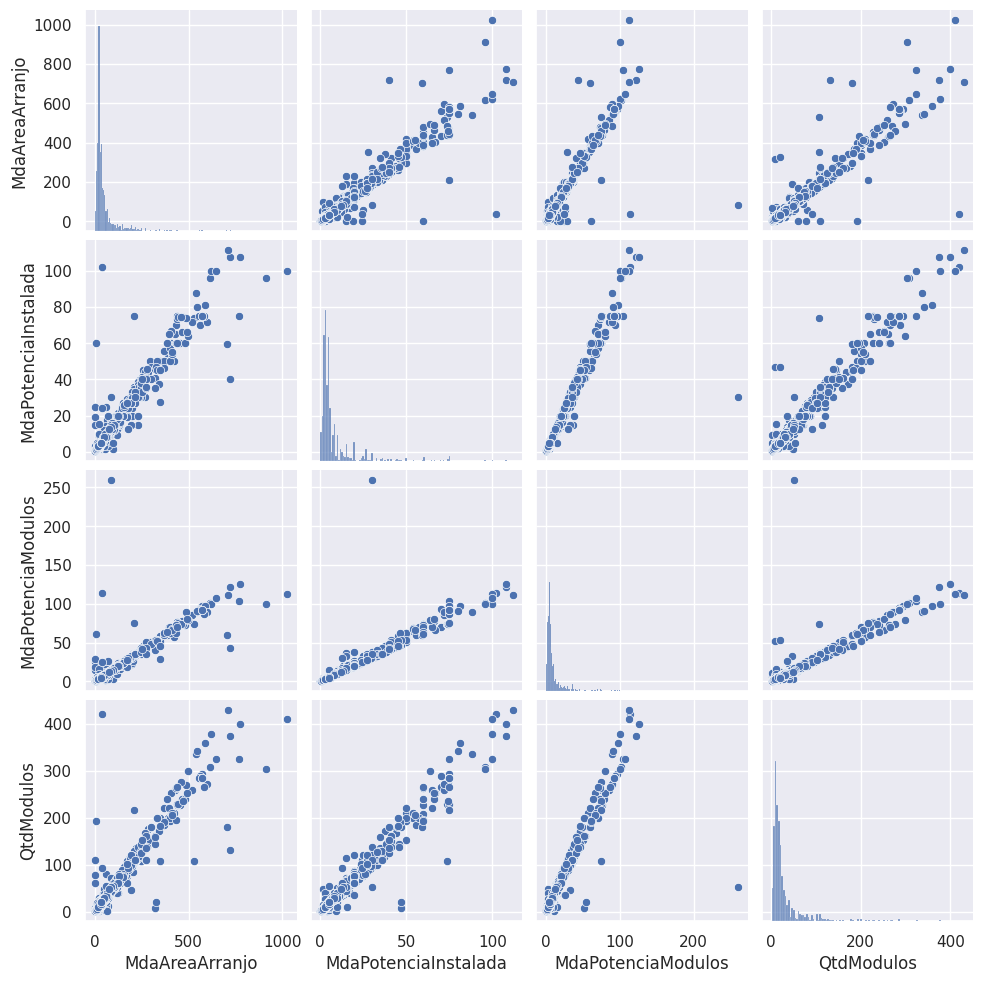

In [97]:
sns.pairplot(df_datconexao_2017[df_datconexao_2017["MdaPotenciaInstalada"] < 150],
             x_vars=["MdaAreaArranjo", "MdaPotenciaInstalada", "MdaPotenciaModulos", "QtdModulos"],
             y_vars=["MdaAreaArranjo", "MdaPotenciaInstalada", "MdaPotenciaModulos", "QtdModulos"])

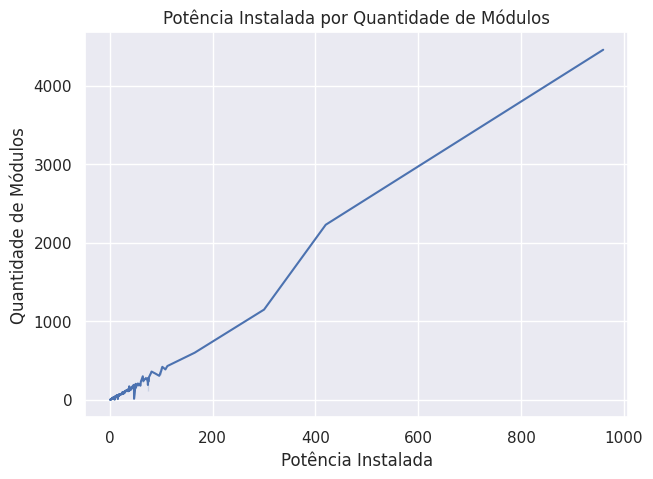

In [98]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=df_datconexao_2017, x="MdaPotenciaInstalada", y="QtdModulos")
plt.title("Potência Instalada por Quantidade de Módulos")
plt.xlabel("Potência Instalada")
plt.ylabel("Quantidade de Módulos")
plt.show()

<center> <h3 style="background-color:#868661; color:white" > <br>Dados anuais do setor <br></h3></center>

In [99]:
df_datconexao_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 308 to 300887
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      1717 non-null   int64         
 1   DatGeracaoConjuntoDados  1717 non-null   datetime64[ns]
 2   CodGeracaoDistribuida    1717 non-null   object        
 3   MdaAreaArranjo           1717 non-null   float32       
 4   MdaPotenciaInstalada     1717 non-null   float32       
 5   NomFabricanteModulo      1717 non-null   object        
 6   NomFabricanteInversor    1717 non-null   object        
 7   DatConexao               1717 non-null   datetime64[ns]
 8   MdaPotenciaModulos       1717 non-null   float32       
 9   MdaPotenciaInversores    1717 non-null   float32       
 10  QtdModulos               1717 non-null   float32       
 11  NomModeloModulo          1717 non-null   object        
 12  NomModeloInversor        1717 non-n


**Medida da potência instalada**

In [100]:
def info_generation(df_datconexao):
    soma_potencia = df_datconexao["MdaPotenciaInstalada"].sum()
    media_potencia_inst = df_datconexao["MdaPotenciaInstalada"].mean()
    qt_instalacao_ano = df_datconexao["DatConexao"].count()
    qt_fabricante_inversores_ano = df_datconexao["NomFabricanteInversor"].nunique()

    data = {"soma_potencia": soma_potencia,
             "media_potencia_inst": media_potencia_inst,
             "qt_instalacao_ano": qt_instalacao_ano,
             "qt_fabricante_inversores_ano": qt_fabricante_inversores_ano}

    return data


<center> <h3 style="background-color:#868661; color:white" > <br>Informação de sistemas fotovoltaicos anuais<br></h3></center>

In [101]:
arrays = [[], [], [], [], []]

for ano in np.sort(df["Year"].unique()):
    data = info_generation(data_for_date(year=ano))
    arrays[0].append(ano)
    arrays[1].append(data["soma_potencia"])
    arrays[2].append(data["media_potencia_inst"])
    arrays[3].append(data["qt_instalacao_ano"])
    arrays[4].append(data["qt_fabricante_inversores_ano"])
info_anual = pd.DataFrame(np.transpose(arrays),
                          columns=["ano", "soma_potencia", "media_potencia_inst",
                                   "qt_instalacao_ano", "qt_fabricante_inversores_ano"])
info_anual.head(20)

,ano,soma_potencia,media_potencia_inst,qt_instalacao_ano,qt_fabricante_inversores_ano
0,2009.0,8.200000e+00,8.200000,1.0,1.0
1,2010.0,6.000000e+00,6.000000,1.0,1.0
2,2011.0,5.000000e+00,5.000000,1.0,1.0
3,2012.0,4.498000e+02,89.959999,5.0,5.0
4,2013.0,1.299070e+03,33.309486,39.0,24.0
5,2014.0,2.442310e+03,9.079220,269.0,79.0
6,2015.0,1.002107e+04,7.890606,1270.0,201.0
7,2016.0,4.748386e+04,7.550303,6289.0,511.0
8,2017.0,1.180928e+05,9.192245,12847.0,884.0
9,2018.0,3.798222e+05,11.355602,33448.0,2013.0


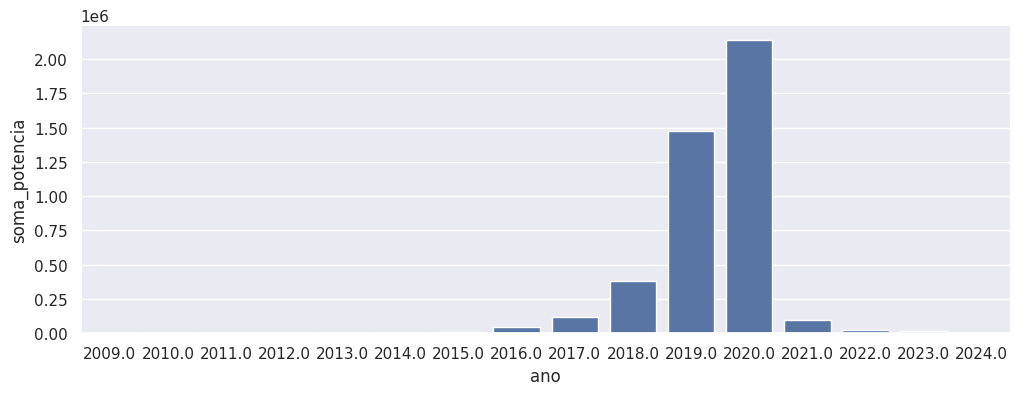

In [102]:
plt.figure(figsize=(12, 4))
sns.barplot(data=info_anual, x="ano", y="soma_potencia")
plt.show()

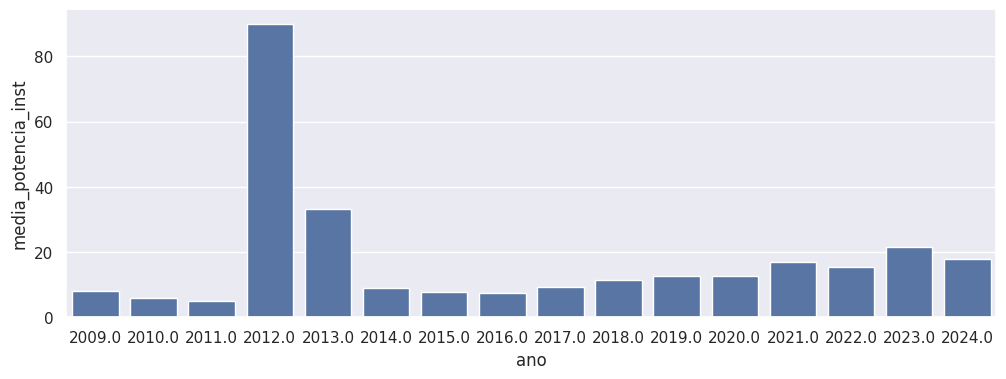

In [103]:
plt.figure(figsize=(12, 4))
sns.barplot(data=info_anual, x="ano", y="media_potencia_inst")
plt.show()

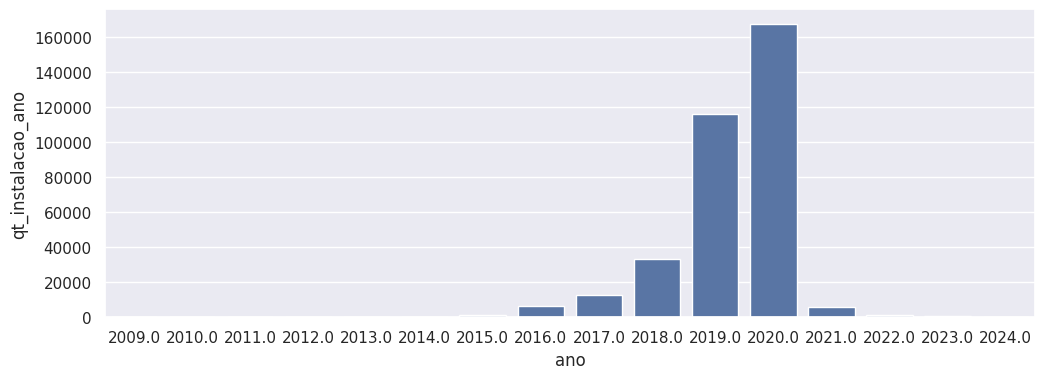

In [104]:
plt.figure(figsize=(12, 4))
sns.barplot(data=info_anual, x="ano", y="qt_instalacao_ano")
plt.show()

ano mes

In [139]:
arrays = [[], [], [], [], []]

for ano in np.sort(df["Year"].unique()):
    for mes in np.sort(df["Month"].unique()):
        data = info_generation(data_for_date(year=ano, month=mes))
        arrays[0].append(f"{ano}-{mes}")
        arrays[1].append(data["soma_potencia"])
        arrays[2].append(data["media_potencia_inst"])
        arrays[3].append(data["qt_instalacao_ano"])
        arrays[4].append(data["qt_fabricante_inversores_ano"])
info_mensal = pd.DataFrame(np.transpose(arrays),
                          columns=["date", "soma_potencia_mes", "media_potencia_inst_mes",
                                   "qt_instalacao_mes", "qt_fabricante_inversores__mes"])
info_mensal["date"] = pd.to_datetime(info_mensal["date"], format='%Y-%m')
info_mensal.head(150)

,date,soma_potencia_mes,media_potencia_inst_mes,qt_instalacao_mes,qt_fabricante_inversores__mes
0,2009-01-01,0.0,nan,0,0
1,2009-02-01,0.0,nan,0,0
2,2009-03-01,0.0,nan,0,0
3,2009-04-01,0.0,nan,0,0
4,2009-05-01,0.0,nan,0,0
...,...,...,...,...,...
145,2021-02-01,14751.51,12.10132,1219,141
146,2021-03-01,24552.648,209.8517,117,51
147,2021-04-01,877.64,13.502154,65,33
148,2021-05-01,1020.7301,13.256235,77,42


<Axes: xlabel='media_potencia_inst_mes', ylabel='soma_potencia_mes'>

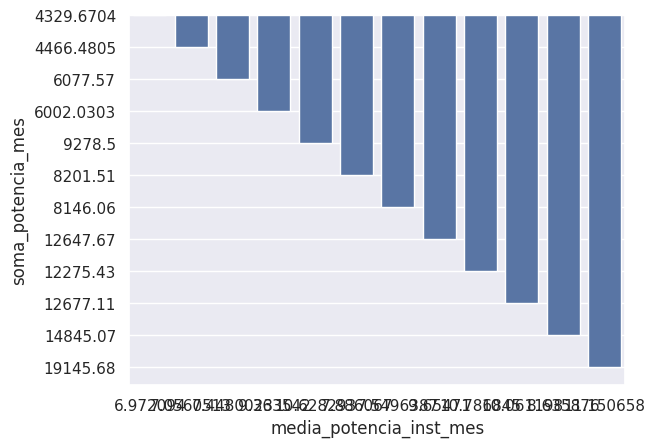

In [147]:
info_mensal[(info_mensal["date"] <= "2017-12-1") & (info_mensal["date"] >= "2017-1-1")]

sns.barplot(info_mensal[(info_mensal["date"] <= "2017-12-1") & (info_mensal["date"] >= "2017-1-1")],
            x="media_potencia_inst_mes", y="soma_potencia_mes")

In [166]:
ano_2017 = info_mensal[(info_mensal["date"] <= "2017-12") & (info_mensal["date"] >= "2017-1")]
#ano_2017.reset_index(drop=True)
#ano_2017["date"] = ano_2017["date"].apply(lambda x: x.month)
ano_2017

,date,soma_potencia_mes,media_potencia_inst_mes,qt_instalacao_mes,qt_fabricante_inversores__mes
96,2017-01-01,4329.6704,6.972094,621,98
97,2017-02-01,4466.4805,7.0560513,633,111
98,2017-03-01,6077.57,7.4480023,816,113
99,2017-04-01,6002.0303,9.363542,641,95
100,2017-05-01,9278.5,10.628293,873,140
101,2017-06-01,8201.51,7.886067,1040,157
102,2017-07-01,8146.06,7.5496387,1079,164
103,2017-08-01,12647.67,9.65471,1310,179
104,2017-09-01,12275.43,10.786845,1138,184
105,2017-10-01,12677.11,10.061198,1260,186
